In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import ast
import seaborn as sns
from adjustText import adjust_text

dataset = load_dataset('Jamiefor3/Worldwide_Layoffs_Data')
df = dataset['train'].to_pandas()

df['date'] = pd.to_datetime(df['date'])

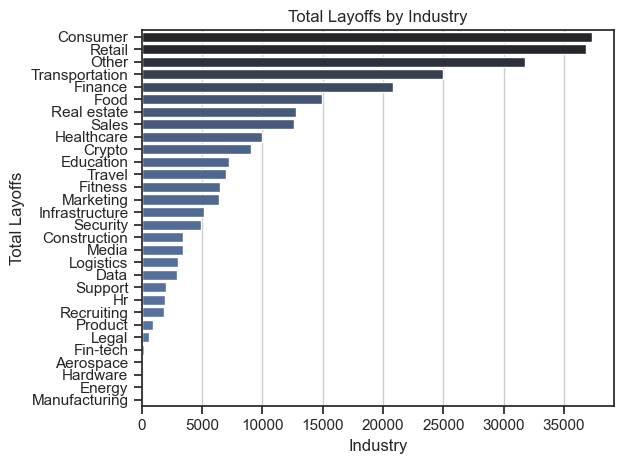

In [19]:
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=industry_layoffs, y='industry', x='total_laid_off', hue='total_laid_off', palette='dark:b_r', legend=False)
plt.title('Total Layoffs by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

In [3]:
# Calculate the average and median percentage of layoffs
average_percentage = df['percentage_laid_off'].mean()
median_percentage = df['percentage_laid_off'].median()

# Print the results
print(f"Average Percentage of Layoffs: {average_percentage:.2%}")
print(f"Median Percentage of Layoffs: {median_percentage:.2%}")


Average Percentage of Layoffs: 21.41%
Median Percentage of Layoffs: 15.00%


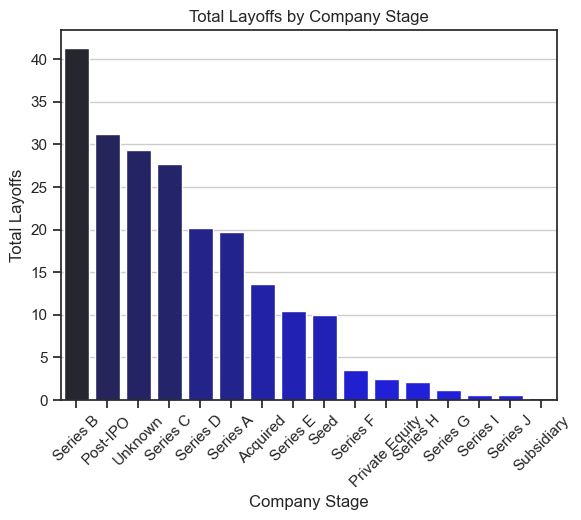

In [15]:
stage_layoffs = df.groupby('stage')['percentage_laid_off'].sum().sort_values(ascending=False).reset_index()

# Create a bar plot to visualize the total layoffs by company stage
sns.barplot(x='stage', y='percentage_laid_off', data=stage_layoffs, hue ='percentage_laid_off', palette='dark:blue_r', legend=False)

# Customize the plot
plt.title('Total Layoffs by Company Stage')
plt.xlabel('Company Stage')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

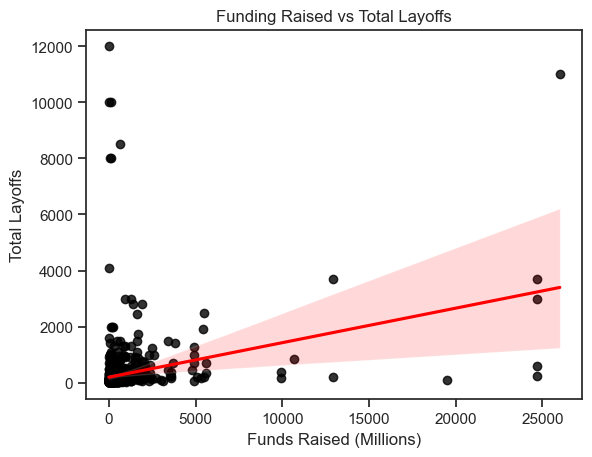

In [13]:
funds_no_outliers = df[df['funds_raised_millions'] <=120000]
sns.regplot(x='funds_raised_millions', y='total_laid_off', data=funds_no_outliers, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.title('Funding Raised vs Total Layoffs')
plt.xlabel('Funds Raised (Millions)')
plt.ylabel('Total Layoffs')
plt.show()

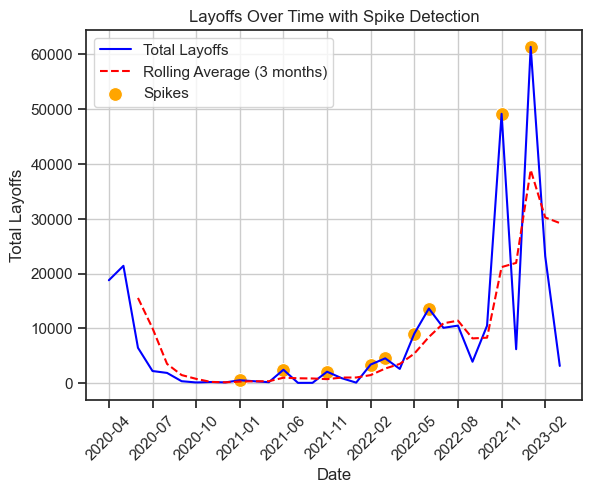

In [14]:
df_month = df.groupby(df['date'].dt.to_period('M'))['total_laid_off'].sum().reset_index()
# Calculate the rolling average to smooth out the trend
df_month['rolling_avg'] = df_month['total_laid_off'].rolling(window=3).mean()

# Create the plot using seaborn
sns.lineplot(x=df_month['date'].astype(str), y=df_month['total_laid_off'], label='Total Layoffs', color='blue')
sns.lineplot(x=df_month['date'].astype(str), y=df_month['rolling_avg'], label='Rolling Average (3 months)', color='red', linestyle='--')

# Highlight spikes (values greater than 1.5x rolling average)
spikes = df_month[df_month['total_laid_off'] > df_month['rolling_avg'] * 1.5]
sns.scatterplot(x=spikes['date'].astype(str), y=spikes['total_laid_off'], color='orange', label='Spikes', s=100)

# Customize the plot
plt.title('Layoffs Over Time with Spike Detection')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
ticks = df_month.index[::3]
tick_labels = df_month['date'].iloc[::3]
plt.xticks(ticks, tick_labels, rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [32]:
company_layoffs = df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False)
company_layoffs

company
Amazon        18000
Google        12000
Meta          11000
Microsoft     10000
Salesforce    10000
              ...  
Aya               5
Woven             5
Spyce             4
Tutormundi        4
Branch            3
Name: total_laid_off, Length: 857, dtype: int64